In [1]:
import fastbook
fastbook.setup_book()

Fastai is organized around two main design goals: To be **approachable** and **rapidly productive**, while also being **deeply hackable and configurable**. It is built on top of a hierarchy of lower-level APIs which provide composable building blocks. This way, a user wanting to rewrite part of the high-level API or add particular behavior to suit their needs does not have to learn how to use the lowest level.

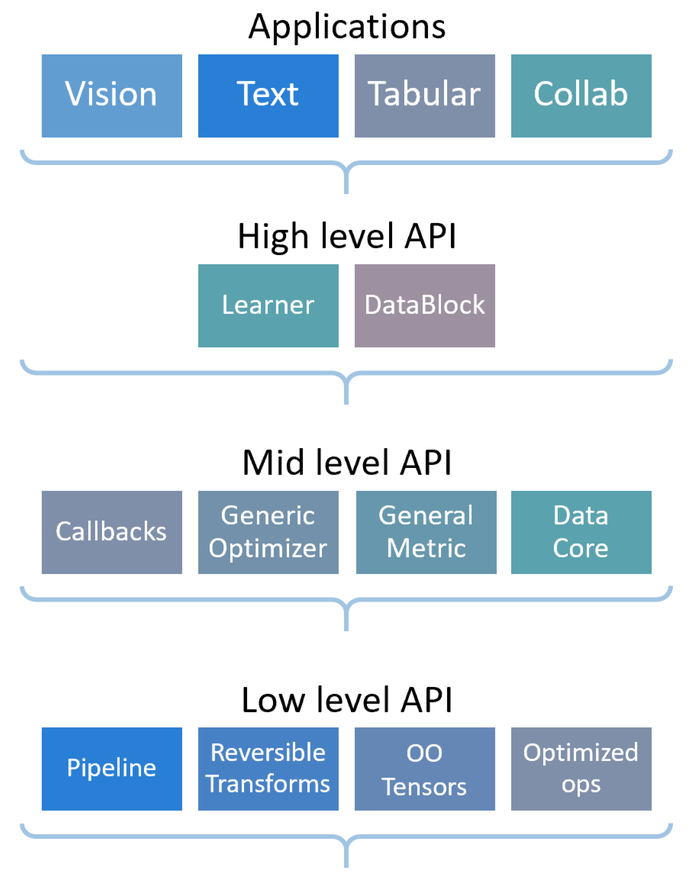

In [2]:
from fastbook import *
from fastai.vision.widgets import *

* The **DataBlock** is like a template for creating a DataLoaders
* We provide a tuple where we specify what types we want for the independent and dependent variables:
    - The independent variable is the thing we are using to make predictions from (Image)
    - The dependent variable is our target(label)
* The get_image_files function takes a path, and returns a list of all of the images in that path
* RandomSplitter: a random split is performed (with an optional seed)
    - valid_pct: percentage of the data for the validation set 
    -  if you provide the same starting point for that list each time—called the seed—then you will get the exact same list each time):
* The independent variable is often referred to as x and the dependent variable is often referred to as y
* **parent_label** is a function provided by fastai that simply gets the name of the folder a file is in.
* To group them in a big array (usually called a tensor) that is going to go through our model, they all need to be of the same size


* **Data augmentation**: 
    - Refers to creating random variations of our input data, such that they appear different, but do not actually change the meaning of the data. (common data augmentation techniques for images are rotation, flipping, perspective warping, brightness changes and contrast changes)
    - a standard set of augmentations that we have found work pretty well are provided with the **aug_transforms** function.

In [3]:
skin_condition = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128),
    batch_tfms=aug_transforms())

In [4]:
dls = skin_condition.dataloaders('./skin_condition')

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


E:\Anaconda\lib\site-packages\torch\_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


* fastai to create **a convolutional neural network (CNN)** and specifies what architecture to use (i.e. what kind of model to create), what data we want to train it on, and what metric to use:
* Why a CNN? It's the current state-of-the-art approach to creating computer vision models. Their structure is inspired by how the human vision system works.
* We're using one called ResNet that we'll be talking a lot about during the book; it is both fast and accurate for many datasets and problems.
    - The 34 in resnet34 refers to the number of layers in this variant of the architecture (other options are 18, 50, 101, and 152)
        - Models using architectures with more layers take longer to train, and are more prone to overfitting
        - On the other hand, when using more data, they can be quite a bit more accurate.
    - A metric is a function that measures the quality of the model's predictions using the validation set, and will be printed at the end of each epoch. 
        - error_rate: which is a function provided by fastai that does just what it says: tells you what percentage of images in the validation set are being classified incorrectly.
        - accuracy = 1.0 - error_rate


* **Fine-tune**: A transfer learning technique where the parameters of a pretrained model are updated by training for additional epochs using a different task to that used for pretraining.

When you use the fine_tune method, fastai will use these tricks for you. There are a few parameters you can set, it does two steps:
1. Use one epoch to fit just those parts of the model necessary to get the new random head to work correctly with your dataset.
2. Use the number of epochs requested when calling the method to fit the entire model, updating the weights of the later layers (especially the head) faster than the earlier layers (which, as we'll see, generally don't require many changes from the pretrained weights).

In [5]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(10)

- Layer 1: For layer 1, what we can see is that the model has discovered weights that represent diagonal, horizontal, and vertical edges, as well as various different gradients.
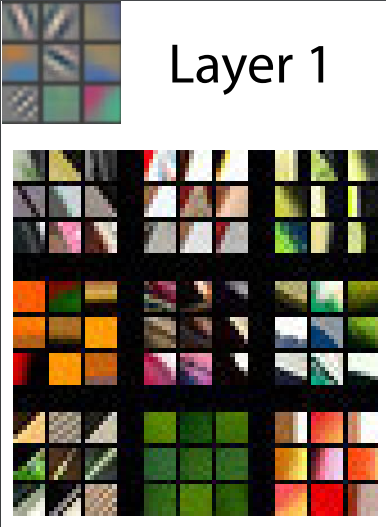



- Layer 2: For layer 2, there are nine examples of weight reconstructions for each of the features found by the model. We can see that the model has learned to create feature detectors that look for corners, repeating lines, circles, and other simple patterns.
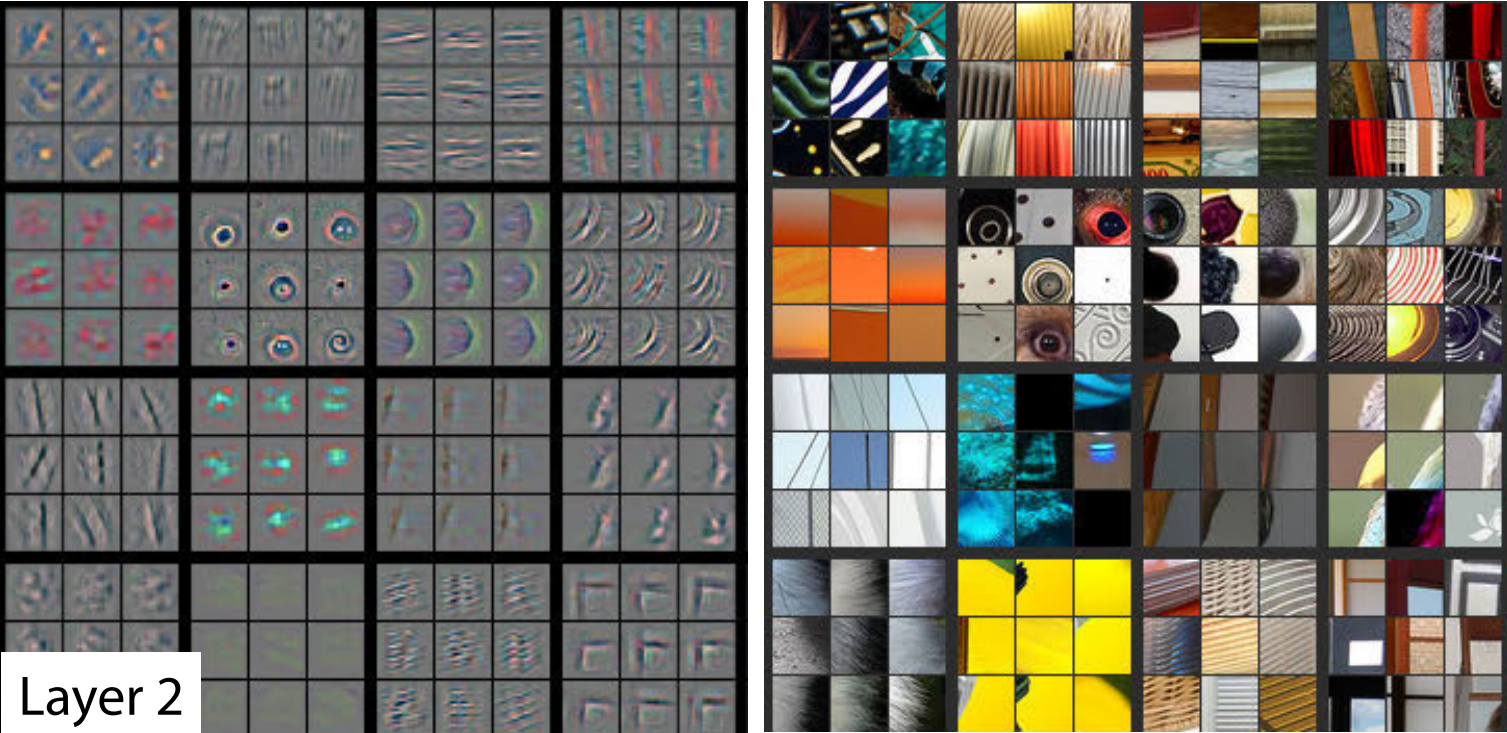

* Layer 3: As you can see by looking at the righthand side of this picture, the features are now able to identify and match with higher-level semantic components, such as car wheels, text, and flower petals. 
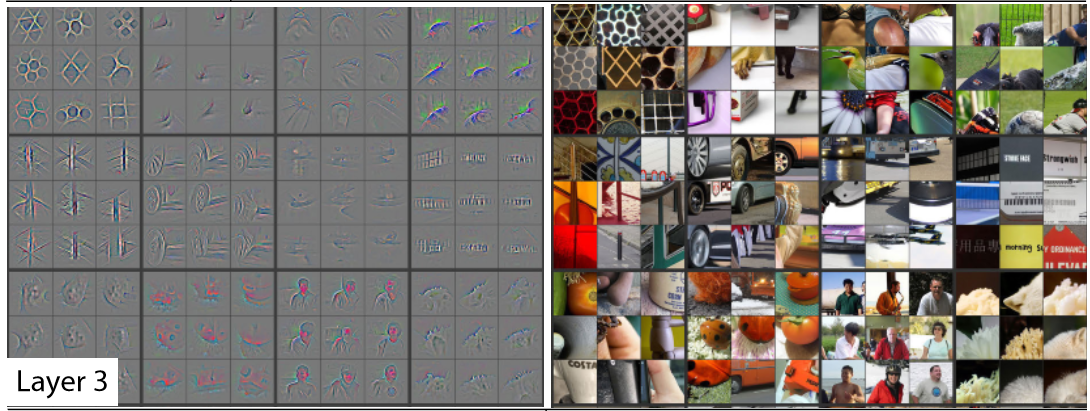

* Layer 4, 5:  Using these components, layers four and five can identify even higher-level concepts.
    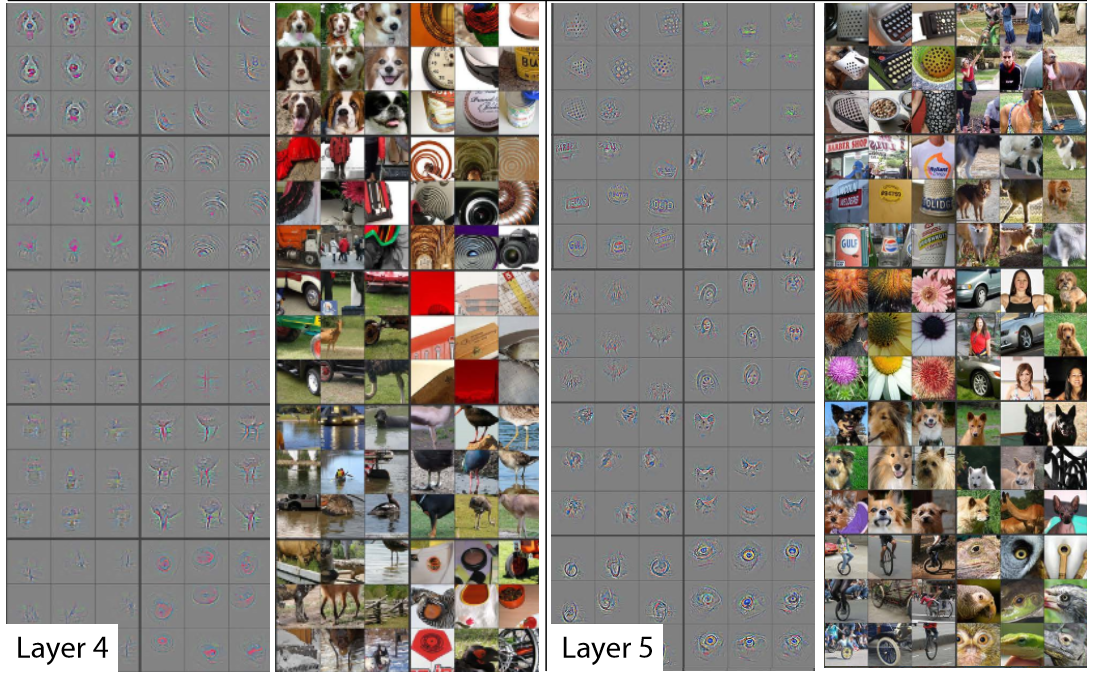

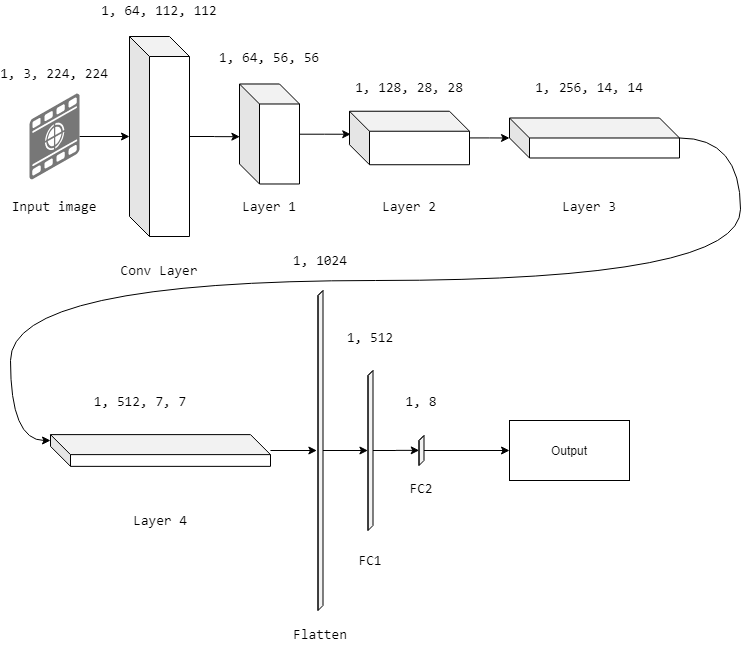

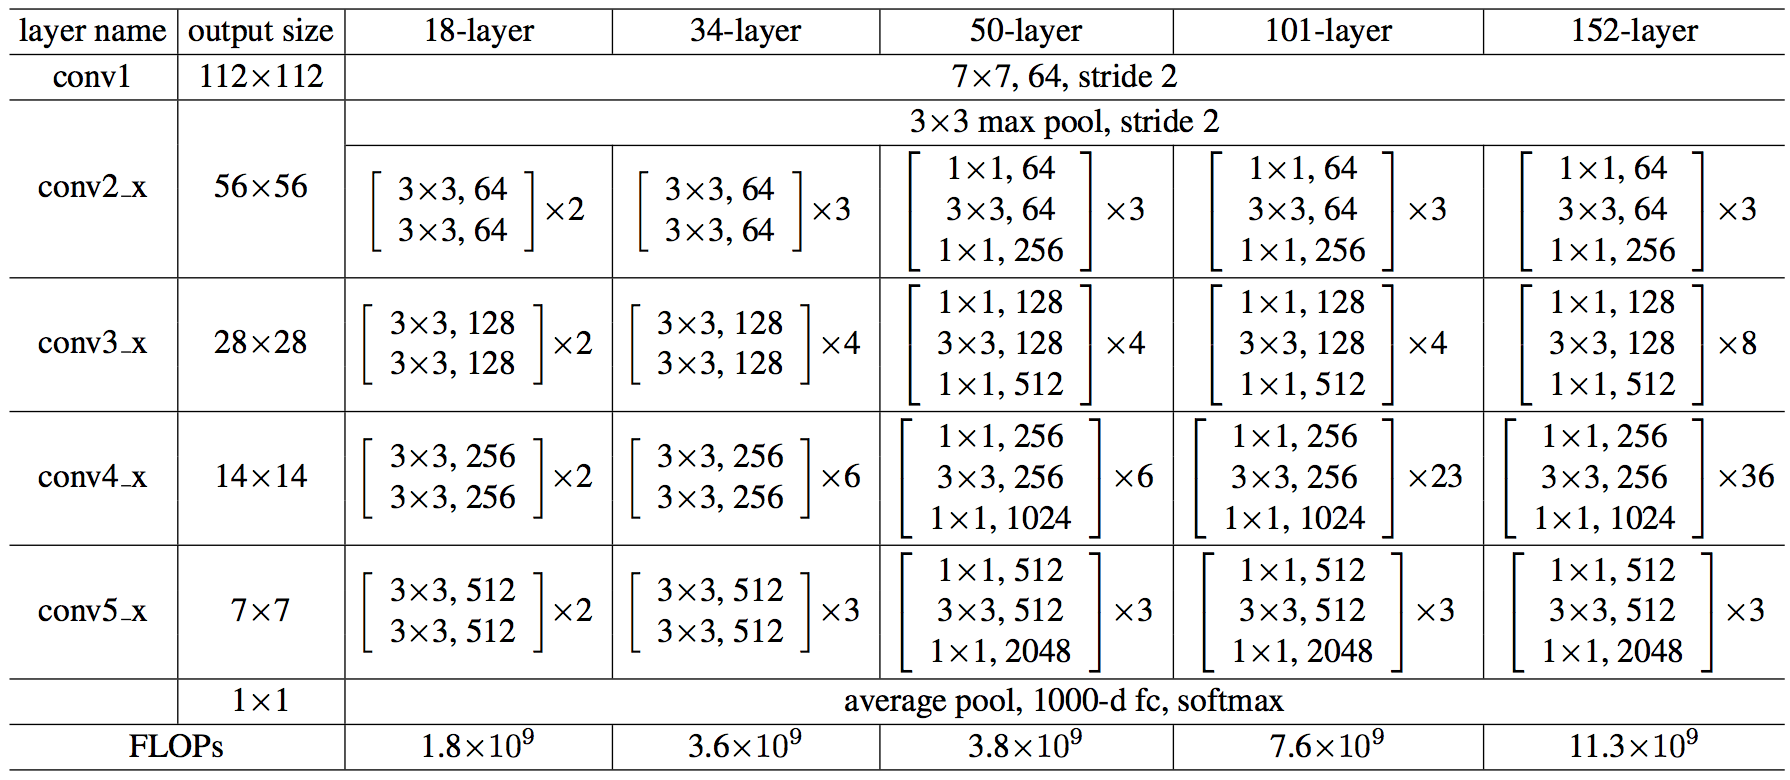

- In computing, floating point operations per second (FLOPS, flops or flop/s) is a measure of computer performance, useful in fields of scientific computations that require floating-point calculations.
- If the size of the features map is halved, the number of filters is doubled to preserve the time complexity of each layer.
- Plain Network: The plain baselines (Fig. 2, middle) are mainly inspired by the philosophy of VGG nets (Fig. 2, left). The convolutional layers mostly have 3×3 filters.

- Residual Network: Based on the above plain network, a shortcut connection is inserted (Fig. 2, right) which turn the network into its counterpart residual version. The identity shortcuts F(x{W}+x) can be directly used when the input and output are of the same dimensions (solid line shortcuts in Fig. 2). When the dimensions increase (dotted line shortcuts in Fig. 2)

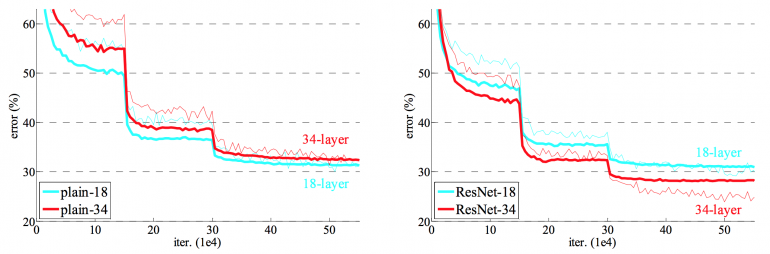

In [6]:
learn.export()

In [7]:
path = Path()